In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import np_utils

#loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [3]:
#Flattening the images form the 32x32x3 pixels to 1D 3072 pixels
#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)

#convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
#normalising the data to help with the training
X_train  /= 255
X_test /= 255

In [5]:
#one-hot encoding using keras numpy-related utilities
#np_utils. to_categorical is used to convert array of labeled data(from 0 to nb_classes -1) to one-hot vector
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [6]:
# Step 2 model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))


In [7]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,Y_train,epochs=50,batch_size=1000,validation_data=(X_test,Y_test))

Epoch 1/10
50/50 [==============================] - 12s 47ms/step - loss: 2.0466 - accuracy: 0.2536 - val_loss: 1.7370 - val_accuracy: 0.4072
Epoch 2/10
50/50 [==============================] - 2s 35ms/step - loss: 1.7469 - accuracy: 0.3692 - val_loss: 1.5442 - val_accuracy: 0.4651
Epoch 3/10
50/50 [==============================] - 2s 35ms/step - loss: 1.6197 - accuracy: 0.4148 - val_loss: 1.4558 - val_accuracy: 0.4881
Epoch 4/10
50/50 [==============================] - 2s 36ms/step - loss: 1.5323 - accuracy: 0.4471 - val_loss: 1.3771 - val_accuracy: 0.5208
Epoch 5/10
50/50 [==============================] - 2s 36ms/step - loss: 1.4776 - accuracy: 0.4646 - val_loss: 1.3333 - val_accuracy: 0.5335
Epoch 6/10
50/50 [==============================] - 2s 38ms/step - loss: 1.4306 - accuracy: 0.4847 - val_loss: 1.3002 - val_accuracy: 0.5418
Epoch 7/10
50/50 [==============================] - 2s 36ms/step - loss: 1.3996 - accuracy: 0.4960 - val_loss: 1.2454 - val_accuracy: 0.5592
Epoch 8/10
5

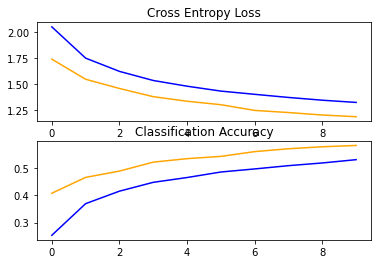

In [10]:
import matplotlib.pyplot as pyplot

pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')



In [11]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [12]:
history = model.fit(X_train,Y_train,epochs=10,batch_size=1000,validation_data=(X_test,Y_test))

Epoch 1/10
50/50 [==============================] - 2s 45ms/step - loss: 1.2976 - accuracy: 0.5356 - val_loss: 1.1677 - val_accuracy: 0.5886
Epoch 2/10
50/50 [==============================] - 2s 38ms/step - loss: 1.2761 - accuracy: 0.5438 - val_loss: 1.1604 - val_accuracy: 0.5885
Epoch 3/10
50/50 [==============================] - 2s 35ms/step - loss: 1.2538 - accuracy: 0.5538 - val_loss: 1.1341 - val_accuracy: 0.5992
Epoch 4/10
50/50 [==============================] - 2s 36ms/step - loss: 1.2395 - accuracy: 0.5592 - val_loss: 1.1215 - val_accuracy: 0.6042
Epoch 5/10
50/50 [==============================] - 2s 36ms/step - loss: 1.2263 - accuracy: 0.5632 - val_loss: 1.1045 - val_accuracy: 0.6115
Epoch 6/10
50/50 [==============================] - 2s 36ms/step - loss: 1.2035 - accuracy: 0.5722 - val_loss: 1.0896 - val_accuracy: 0.6139
Epoch 7/10
50/50 [==============================] - 2s 38ms/step - loss: 1.1919 - accuracy: 0.5776 - val_loss: 1.0695 - val_accuracy: 0.6212
Epoch 8/10
50

In [13]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epochs = range(1, len(acc2)+1)

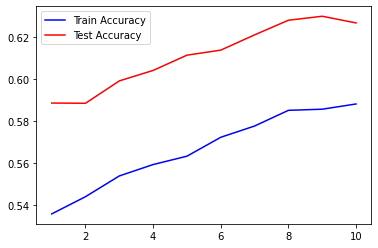

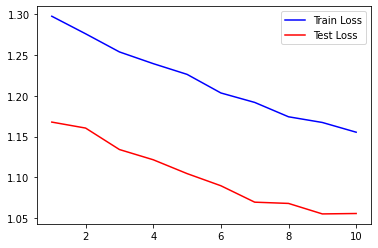

In [15]:
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()